# Amazon StockPrice ExploratoryData Analysis and Prediction usin Machine Learning 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("amazon.csv")

In [7]:
df

,Date,Close/Last,Volume,Open,High,Low
0,03/17/2022,$3144.78,3646742,$3052.81,$3149.97,$3042.8
1,03/16/2022,$3062.08,4247884,$2970,$3063,$2947.07
2,03/15/2022,$2947.33,3779230,$2857,$2959.7,$2840
3,03/14/2022,$2837.06,3704305,$2919.62,$2949,$2817.68
4,03/11/2022,$2910.49,3445028,$2991.49,$2993.5,$2907.38
...,...,...,...,...,...,...
2512,03/23/2012,$195.04,5983666,$192.01,$196.2,$191.8
2513,03/22/2012,$192.4,3738879,$190.54,$194.06,$190.26
2514,03/21/2012,$191.73,4213108,$192.5,$194.28,$191.26
2515,03/20/2012,$192.33,9117999,$184.88,$194.41,$182.88


In [8]:
df["Close/Last"]= df["Close/Last"].str.replace("$", "")
df["Open"] = df["Open"].str.replace("$", "")
df["High"] = df["High"].str.replace("$", "")
df["Low"] = df["Low"].str.replace("$", "")


In [9]:
df["Close"]=df["Close/Last"]

In [10]:
df.drop("Close/Last", inplace=True, axis=1)

In [11]:
df

,Date,Volume,Open,High,Low,Close
0,03/17/2022,3646742,3052.81,3149.97,3042.8,3144.78
1,03/16/2022,4247884,2970,3063,2947.07,3062.08
2,03/15/2022,3779230,2857,2959.7,2840,2947.33
3,03/14/2022,3704305,2919.62,2949,2817.68,2837.06
4,03/11/2022,3445028,2991.49,2993.5,2907.38,2910.49
...,...,...,...,...,...,...
2512,03/23/2012,5983666,192.01,196.2,191.8,195.04
2513,03/22/2012,3738879,190.54,194.06,190.26,192.4
2514,03/21/2012,4213108,192.5,194.28,191.26,191.73
2515,03/20/2012,9117999,184.88,194.41,182.88,192.33


In [12]:
df.tail()

,Date,Volume,Open,High,Low,Close
2512,03/23/2012,5983666,192.01,196.2,191.8,195.04
2513,03/22/2012,3738879,190.54,194.06,190.26,192.4
2514,03/21/2012,4213108,192.5,194.28,191.26,191.73
2515,03/20/2012,9117999,184.88,194.41,182.88,192.33
2516,03/19/2012,3903327,183.45,186.68,183,185.52


In [13]:
df.shape

(2517, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2517 non-null   object
 1   Volume  2517 non-null   int64 
 2   Open    2517 non-null   object
 3   High    2517 non-null   object
 4   Low     2517 non-null   object
 5   Close   2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [15]:
df[["Volume","Open", "High","Low","Close"]] = df[['Volume', 'Open', "High","Low","Close"]].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Volume  2517 non-null   float64
 2   Open    2517 non-null   float64
 3   High    2517 non-null   float64
 4   Low     2517 non-null   float64
 5   Close   2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 118.1+ KB


In [17]:
df.describe()

,Volume,Open,High,Low,Close
count,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000
mean,4.001633e+06,1306.404154,1320.192224,1290.918121,1305.808701
std,2.134322e+06,1073.249878,1085.374773,1059.557803,1072.217790
min,8.813370e+05,183.450000,186.680000,182.880000,185.500000
25%,2.677150e+06,355.280000,359.340000,349.450000,355.900000
50%,3.444735e+06,853.550000,857.350000,850.310000,853.080000
75%,4.630850e+06,1875.000000,1894.270000,1858.000000,1874.970000
max,2.384672e+07,3744.000000,3773.078200,3696.792900,3731.410000


In [18]:
df.columns

Index(['Date', 'Volume', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [19]:
df.isnull().sum()

Date      0
Volume    0
Open      0
High      0
Low       0
Close     0
dtype: int64

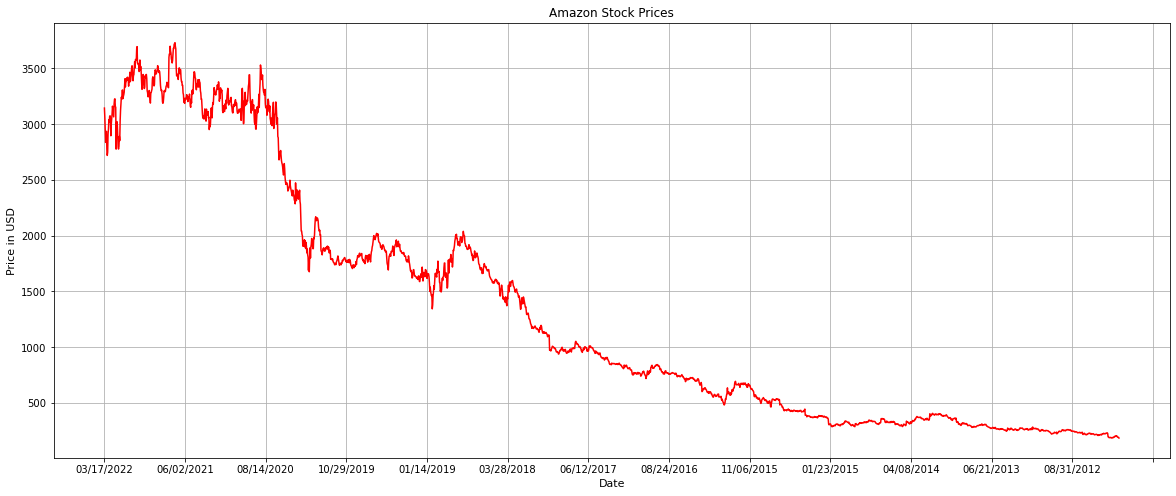

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()


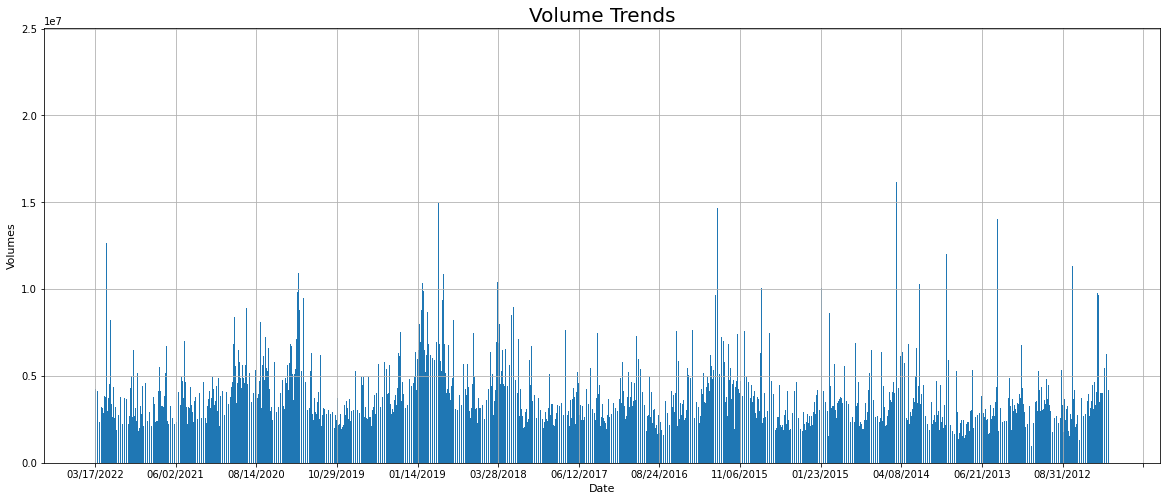

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [22]:
df["Market_Cap"] = df["Open"]*df["Volume"]

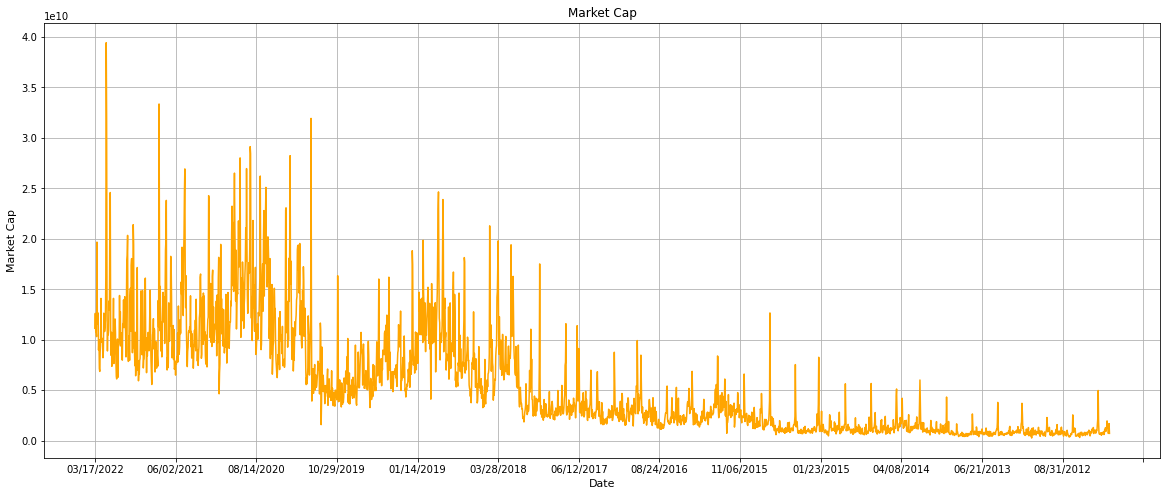

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Market_Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [24]:
df.iloc[df["Market_Cap"].argmax()]

Date                  02/04/2022
Volume                12672790.0
Open                     3112.13
High                      3224.0
Low                      3012.16
Close                    3152.79
Market_Cap    39439369942.700005
Name: 28, dtype: object

In [25]:
ohlc = df[(df['Date'] > '03/19/2012')]

In [26]:
ohlc = ohlc.loc[:, ['Date', 'Volume', 'Open', 'High', 'Low', 'Close', 'Market_Cap']]

In [27]:
ohlc.Date

52      12/31/2021
53      12/30/2021
54      12/29/2021
55      12/28/2021
56      12/27/2021
           ...    
2511    03/26/2012
2512    03/23/2012
2513    03/22/2012
2514    03/21/2012
2515    03/20/2012
Name: Date, Length: 1994, dtype: object

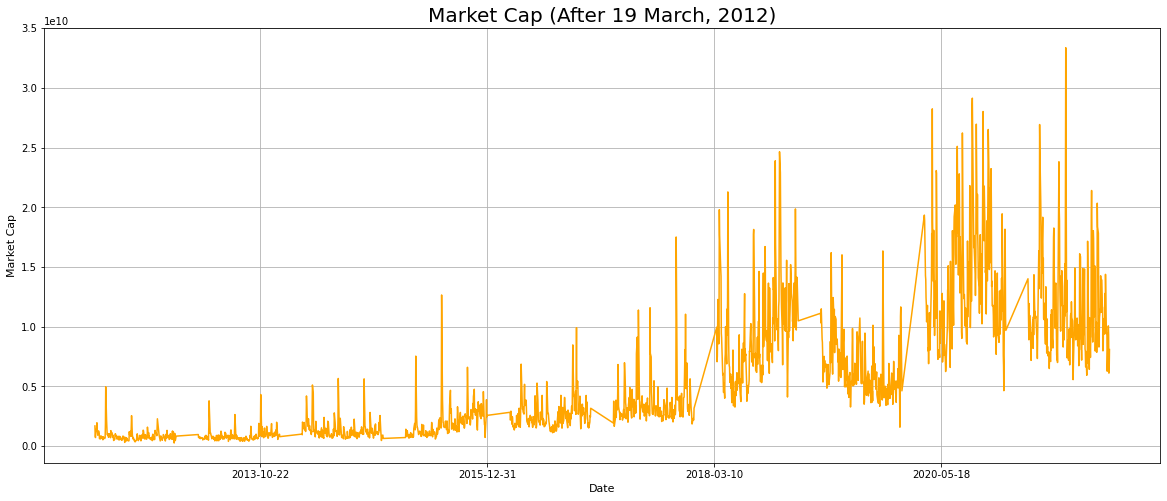

In [28]:

ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%m/%d/%Y")
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market_Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 19 March, 2012)', fontsize='20')
plt.show()


In [29]:
df["vol"] = (df["Close"]/df["Close"].shift(1))-1

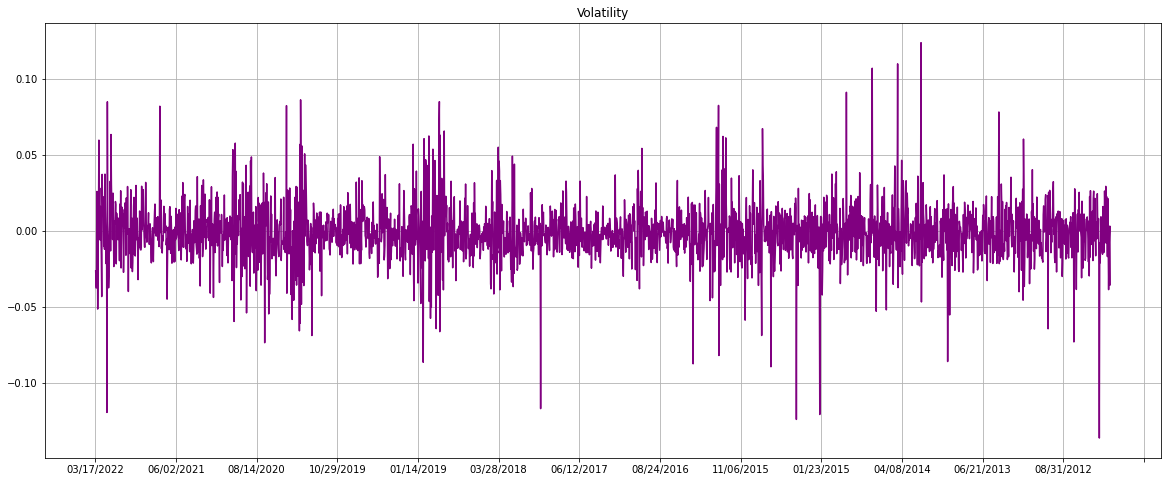

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()


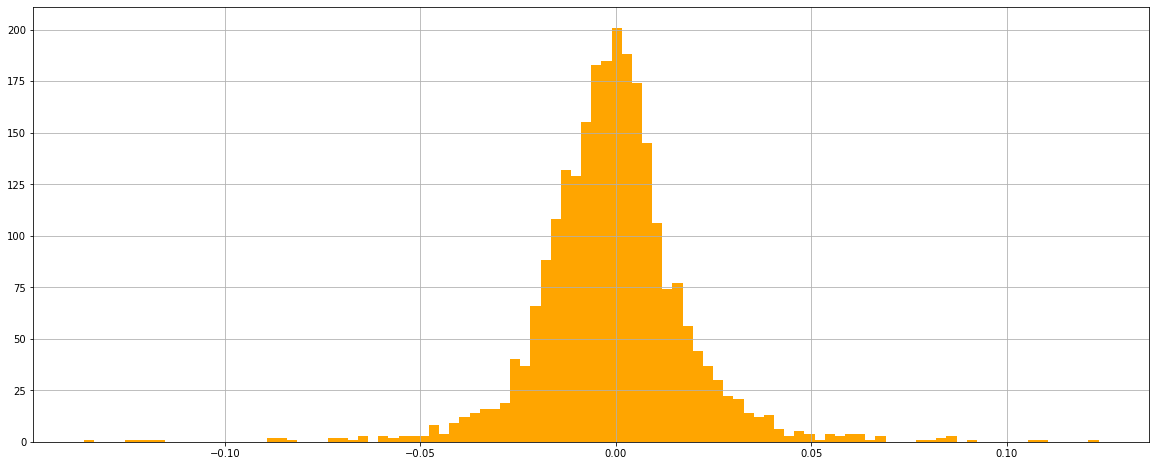

In [31]:
df['vol'].hist(bins=100, color='orange',figsize=(20,8));

In [32]:
df['Cumulative Return'] = (1 + df['vol']).cumprod()

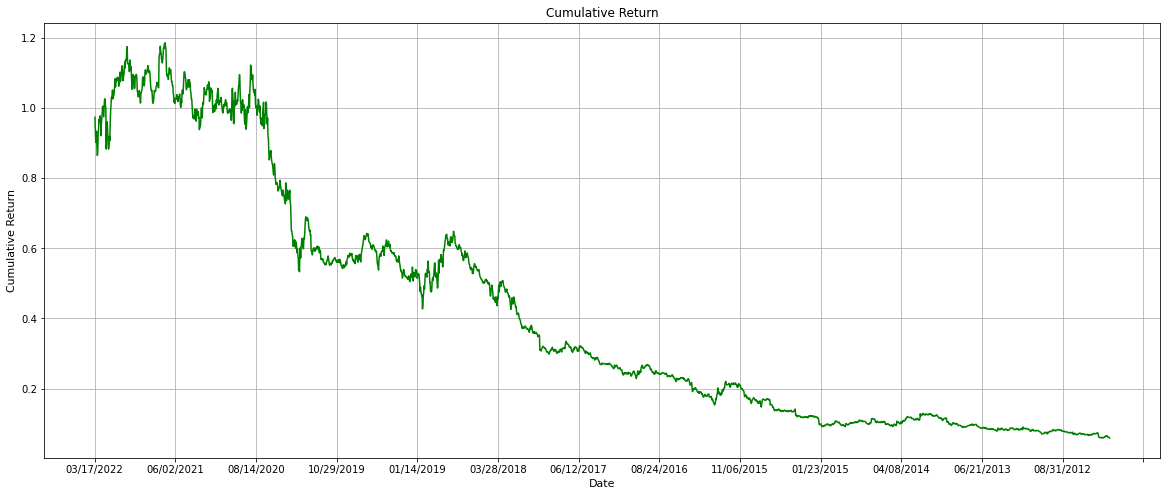

In [33]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

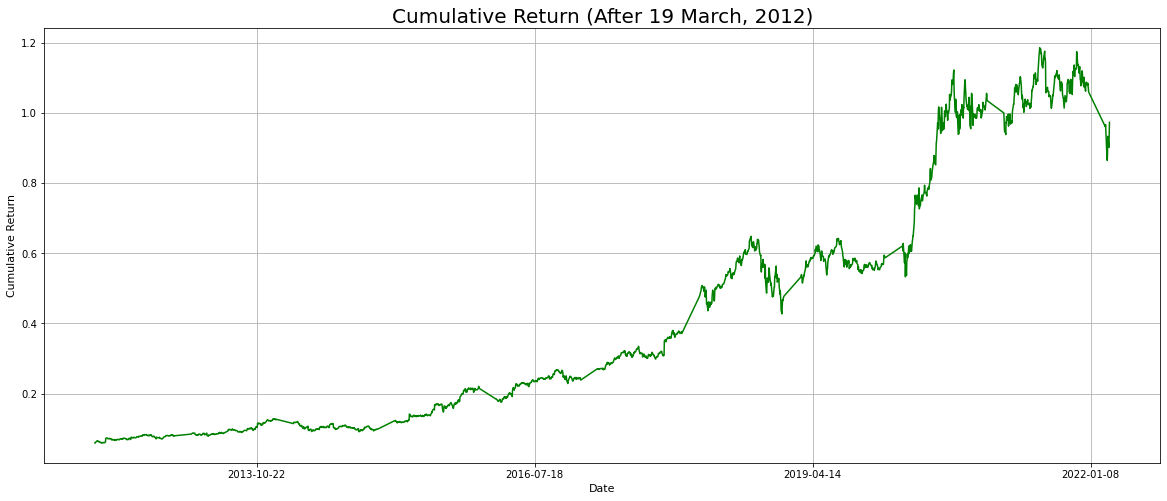

In [34]:
ohlc = df[(df['Date'] > '03-19-2012')]
ohlc = ohlc.loc[:, ['Date', 'Volume', 'Open', 'High', 'Low', 'Close', 'Market_Cap','Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%m/%d/%Y")
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After 19 March, 2012)', fontsize='20')
plt.show()


In [35]:
df.iloc[df["Cumulative Return"].argmax()]

Date                         07/08/2021
Volume                        5180623.0
Open                            3643.56
High                          3759.9855
Low                             3621.12
Close                           3731.41
Market_Cap           18875910737.880001
vol                            0.003245
Cumulative Return              1.186541
Name: 175, dtype: object

In [36]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [37]:
df["Date"] = pd.to_datetime(df["Date"])


In [38]:
df.set_index("Date", inplace=True)

In [39]:
df.dropna()

,Volume,Open,High,Low,Close,Market_Cap,vol,Cumulative Return
Date,,,,,,,,
2022-03-16,4247884.0,2970.00,3063.000,2947.07,3062.08,1.261622e+10,-0.026298,0.973702
2022-03-15,3779230.0,2857.00,2959.700,2840.00,2947.33,1.079726e+10,-0.037475,0.937213
2022-03-14,3704305.0,2919.62,2949.000,2817.68,2837.06,1.081516e+10,-0.037414,0.902149
2022-03-11,3445028.0,2991.49,2993.500,2907.38,2910.49,1.030577e+10,0.025882,0.925499
2022-03-10,6753145.0,2913.70,2973.485,2879.56,2936.35,1.967664e+10,0.008885,0.933722
...,...,...,...,...,...,...,...,...
2012-03-23,5983666.0,192.01,196.200,191.80,195.04,1.148924e+09,-0.038596,0.062020
2012-03-22,3738879.0,190.54,194.060,190.26,192.40,7.124060e+08,-0.013536,0.061181
2012-03-21,4213108.0,192.50,194.280,191.26,191.73,8.110233e+08,-0.003482,0.060968


In [40]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2014

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [42]:
scaled_data

array([[8.34561509e-01],
       [8.11238864e-01],
       [7.78877636e-01],
       ...,
       [1.75695379e-03],
       [1.92616282e-03],
       [5.64030108e-06]])

In [43]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()


[array([0.83456151, 0.81123886, 0.77887764, 0.74777984, 0.7684882 ,
       0.77578111, 0.7332617 , 0.71484894, 0.72296251, 0.7691453 ,
       0.78187828, 0.80530809, 0.80017259, 0.81382776, 0.81509965,
       0.8013909 , 0.76455409, 0.79484533, 0.80840461, 0.81997287,
       0.83942063, 0.83045255, 0.82287481, 0.8123077 , 0.84451382,
       0.85684352, 0.85810695, 0.83848998, 0.83682045, 0.73081663,
       0.79718605, 0.80046307, 0.79132578, 0.75976548, 0.73528375,
       0.73096892, 0.73724939, 0.76295789, 0.75223567, 0.80313657,
       0.82925963, 0.84402875, 0.86219334, 0.85698171, 0.87950343,
       0.88037767, 0.85851587, 0.86453971, 0.86848792, 0.87470917,
       0.89256072, 0.90881889, 0.88802028, 0.89889196, 0.90203079,
       0.91026563, 0.90467327, 0.91256405, 0.91238638, 0.9088894 ])]
[0.8900620715133776]



In [44]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1954, 60, 1)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [47]:
model.compile(optimizer ="adam", loss="mean_squared_error")

In [48]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1954/1954 [==============================] - 45s 22ms/step - loss: 0.0017
Epoch 2/10
1954/1954 [==============================] - 39s 20ms/step - loss: 8.3300e-04
Epoch 3/10
1954/1954 [==============================] - 38s 19ms/step - loss: 6.3165e-04
Epoch 4/10
1954/1954 [==============================] - 37s 19ms/step - loss: 4.5615e-04
Epoch 5/10
1954/1954 [==============================] - 38s 20ms/step - loss: 4.0148e-04
Epoch 6/10
1954/1954 [==============================] - 40s 20ms/step - loss: 4.1376e-04
Epoch 7/10
1954/1954 [==============================] - 40s 21ms/step - loss: 2.9141e-04
Epoch 8/10
1954/1954 [==============================] - 40s 20ms/step - loss: 2.6950e-04
Epoch 9/10
1954/1954 [==============================] - 38s 19ms/step - loss: 3.0839e-04
Epoch 10/10
1954/1954 [==============================] - 39s 20ms/step - loss: 3.0235e-04


In [58]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [59]:
x_test = np.array(x_test)

In [60]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(503, 60, 1)

In [61]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [62]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15.567640807789978

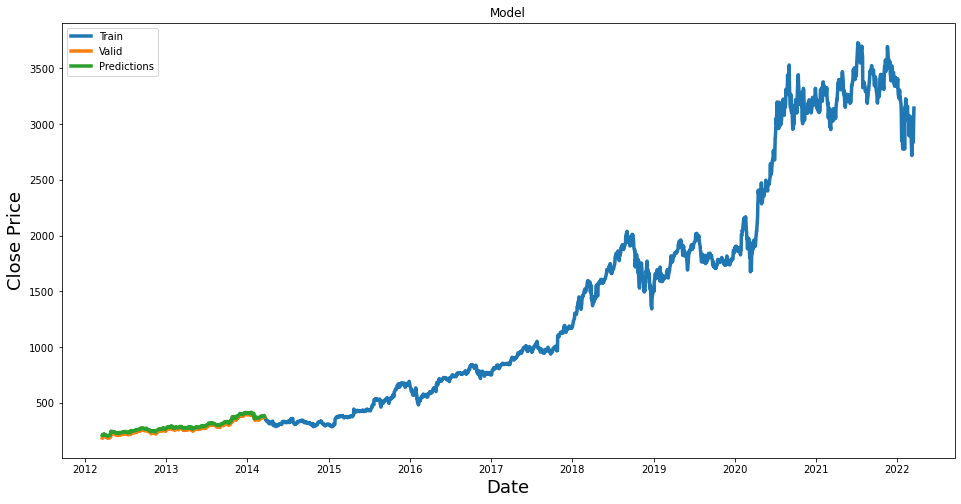

In [63]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'] )